# Causal Impact Analysis

### Databricks Widget Descriptions:
* __Project Name__: Specific name to create a path to write analysis data in hive.
* __Treatment Start and End Date__: The first and last date of exposure to treatment content in '%Y-%m-%d' format.
* __Treatment Content IDs__: hread_ID, NTC Workout_ID or Email Comm_ID Value(s) for the treatment Content. For a collection of values, use a comma-separated list.
* __Geo__: Restricts the geography for the analysis. Default is no filter, and Marketplace will determine countries.
* __Marketplace__: Country cd codes (example: us, jp, fr, ... ) to restrict the marketplace for the analysis. For a collection of values, use a comma-separated list. Default is all marketplaces.
* __Member Tenure__: Restricts the length of time since a member has first interacted with the thread_ID. Default is all tenure groups.
* __Age Group__: Restricts the age group of members to be analyzed. Default is all age groups.
* __Gender__: Restricts the gender of the members to be analyzed. Default is all genders.
* __Control-Treatment Matching Criteria__: Matches the Control Groups to the Treatment Group based on the selected dimensions.
* __Number of Control Groups__: Number of synthetic control groups to create and use for causal impact. Default is 5.
* __Post-treatment Period__: Number of days after exposure for measuring the impact.
* __Target KPI__: Engagement metric used for the Causal Impact model. Choosing between different metrics that measure number of unique members with different types of digital behavior.

## Setup Notebook with Selected Databricks Parameters

In [0]:
%sql 
SET spark.databricks.delta.formatCheck.enabled=false

key,value
spark.databricks.delta.formatCheck.enabled,false


In [0]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [0]:
!pip install pycausalimpact
!pip install scipy==1.7.1
!pip install pandas ==1.2.2

Collecting pycausalimpact
 Downloading pycausalimpact-0.1.1-py2.py3-none-any.whl (30 kB)
Requirement already satisfied: matplotlib>=2.2.3 in /databricks/python3/lib/python3.8/site-packages (from pycausalimpact) (3.4.2)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from pycausalimpact) (1.6.2)
Requirement already satisfied: jinja2>=2.10 in /databricks/python3/lib/python3.8/site-packages (from pycausalimpact) (2.11.3)
Requirement already satisfied: statsmodels>=0.11.0 in /databricks/python3/lib/python3.8/site-packages (from pycausalimpact) (0.12.2)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from pycausalimpact) (1.19.2)
Requirement already satisfied: MarkupSafe>=0.23 in /databricks/python3/lib/python3.8/site-packages (from jinja2>=2.10->pycausalimpact) (1.1.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2.3->pycausalimpact) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2.3->pycausalimpact) (0.10.0)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2.3->pycausalimpact) (2.8.1)
Requirement already satisfied: pillow>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2.3->pycausalimpact) (8.2.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib>=2.2.3->pycausalimpact) (1.3.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib>=2.2.3->pycausalimpact) (1.15.0)
Requirement already satisfied: patsy>=0.5 in /databricks/python3/lib/python3.8/site-packages (from statsmodels>=0.11.0->pycausalimpact) (0.5.1)
Requirement already satisfied: pandas>=0.21 in /databricks/python3/lib/python3.8/site-packages (from statsmodels>=0.11.0->pycausalimpact) (1.2.4)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.21->statsmodels>=0.11.0->pycausalimpact) (2020.5)
Installing collected packages: pycausalimpact
Successfully installed pycausalimpact-0.1.1
 WARNING: You are using pip version 21.0.1; however, version 23.3.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command. 
Collecting scipy==1.7.1
 Downloading scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
 | 10 kB 42.3 MB/s eta 0:00:01 | | 20 kB 52.5 MB/s eta 0:00:01 | | 30 kB 66.8 MB/s eta 0:00:01 | | 40 kB 28.6 MB/s eta 0:00:01 | | 51 kB 24.3 MB/s eta 0:00:02 | | 61 kB 28.2 MB/s eta 0:00:02 | | 71 kB 29.8 MB/s eta 0:00:01 | | 81 kB 27.9 MB/s eta 0:00:02 | | 92 kB 30.6 MB/s eta 0:00:01 |▏ | 102 kB 31.8 MB/s eta 0:00:01 |▏ | 112 kB 31.8 MB/s eta 0:00:01 |▏ | 122 kB 31.8 MB/s eta 0:00:01 |▏ | 133 kB 31.8 MB/s eta 0:00:01 |▏ | 143 kB 31.8 MB/s eta 0:00:01 |▏ | 153 kB 31.8 MB/s eta 0:00:01 |▏ | 163 kB 31.8 MB/s eta 0:00:01 |▏ | 174 kB 31.8 MB/s eta 0:00:01 |▏ | 184 kB 31.8 MB/s eta 0:00:01 |▏ | 194 kB 31.8 MB/s eta 0:00:01 |▎ | 204 kB 31.8 MB/s eta 0:00:01 |▎ | 215 kB 31.8 MB/s eta 0:00:01 |▎ | 225 kB 31.8 MB/s eta 0:00:01 |▎ | 235 kB 31.8 MB/s eta 0:00:01 |▎ | 245 kB 31.8 MB/s eta 0:00:01 |▎ | 256 kB 31.8 MB/s eta 0:00:01 |▎ | 266 kB 31.8 MB/s eta 0:00:01 |▎ | 276 kB 31.8 MB/s eta 0:00:01 |▎ | 286 kB 31.8 MB/s eta 0:00:01 |▍ | 296 kB 31.8 MB/s eta 0:00:01 |▍ | 307 kB 31.8 MB/s eta 0:00:01 |▍ | 317 kB 31.8 MB/s eta 0:00:01 |▍ | 327 kB 31.8 MB/s eta 0:00:01 |▍ | 337 kB 31.8 MB/s eta 0:00:01 |▍ | 348 kB 31.8 MB/s eta 0:00:01 |▍ | 358 kB 31.8 MB/s eta 0:00:01 |▍ | 368 kB 31.8 MB/s eta 0:00:01 |▍ | 378 kB 31.8 MB/s eta 0:00:01 |▍ | 389 kB 31.8 MB/s eta 0:00:01 |▌ | 399 kB 31.8 MB/s eta 0:00:01 |▌ | 409 kB 31.8 MB/s eta 0:00:01 |▌ |

In [0]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import random
import matplotlib.pyplot as plt
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.window import Window
from causalimpact import CausalImpact
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from pyspark.sql.types import StringType, DateType, FloatType
from pyspark.sql.functions import when, lit, col, count, sum, avg, max, countDistinct, weekofyear, concat_ws, datediff, coalesce, lower, rand, floor

In [0]:
pd.set_option('display.max_rows', None)

In [0]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 19:19:39

In [0]:
dbutils.widgets.removeAll()

dbutils.widgets.text("project_val", defaultValue = "", label = '1-Input Project Name For Saving Results')

# Treatment Dates
dbutils.widgets.text("treatment_start_date", defaultValue = "2023-09-01", label = '2-Select Treatment Start Date')
dbutils.widgets.text("treatment_end_date", defaultValue = "2023-10-01", label = '3-Select Treatment End Date')

# Treatment / Control 
dbutils.widgets.text("treatment_value_any", defaultValue = "", label = '4-Input Treatment Content IDs (comma-separated)')

# Demographic (Marketplace, Gender, Age Group, Tenure)
dbutils.widgets.dropdown("geo_select", 'All Geos', ['All Geos','APLA', 'EMEA', 'NA'], label = '5-Select Geo')
dbutils.widgets.text("marketplace_select", defaultValue = "", label = '6-Input Marketplace (comma-separated)')
dbutils.widgets.dropdown("gender_select",  'All', ['All', 'Men', 'Women'], "7-Select Gender")
dbutils.widgets.dropdown("age_select",  'All', ['All', '<=25', '>25'], "8-Select Age Group")
dbutils.widgets.multiselect("tenure_select",  'All', ['All','tenure>=180', '7<tenure<180', 'tenure<=7'], label = '9-Select Member Tenure')

#synthetic control group options
dbutils.widgets.multiselect("sampling_select",defaultValue='tenure_group',
                            choices=['preferred_gender', 'age_group', 'tenure_group', 'nrc_run_cadence', 'ntc_workout_cadence', 'nikeapp_thread_view_cadence','email_link_click_cadence'], label = '10-Select Control-Treatment Matching Criteria')

dbutils.widgets.dropdown("num_control_groups", '3', ['1', '3', '5', '10'], label = '11-Select Number of Control Groups')


# Target KPI 
dbutils.widgets.dropdown("target_kpi_value", 'unique_members_with_nikeapp_thread_cta_clicks',
                         ['unique_members_with_nikeapp_app_opens',
                          'unique_members_with_nikeapp_add_to_carts',
                          'unique_members_with_nikeapp_thread_cta_clicks',
                          'unique_members_with_nrc_app_opens',
                          'unique_members_with_nrc_run_starts',
                          'unique_members_with_ntc_app_opens',
                          'unique_members_with_ntc_workout_starts',
                          'unique_members_with_email_link_clicks',
                          'unique_members_with_email_purchases',
                          'unique_members_with_nddc_purchases',
                          'unique_members_with_selected_product_group_nddc_purchases',
                          'unique_members_with_ecosystemt_app_opens',
                          'unique_members_with_ecosystem_thread_views'
                          # ,'unique_members_with_7d_returning_ecosystemt_app_opens'
                          # ,'unique_members_with_7d_returning_ecosystem_thread_views'
                          ], label = '12-Select Target KPI')

dbutils.widgets.dropdown("post_period_value", '7', ['90', '30', '7', '2'], label = '13-Select Post-Treatment Days For Impact Measurement')

dbutils.widgets.text("product_group", defaultValue = "", label = '14-Input Product Franchise, Gender Construct or Sport Dimension For unique_members_with_selected_product_group_digital_purchase Target KPI')

dbutils.widgets.multiselect("channel_select",  'All', ['All','Nike App', 'NTC', 'NRC', 'Email'], label = '15-Select Channels For Treatment, Target KPIs and/or Control-Treatment Matching Criteria')

channel_vals = dbutils.widgets.get('channel_select')

# get widget values as variables
treatment_value_any = dbutils.widgets.get("treatment_value_any").replace(" ", "").replace("\'", "").replace("\"", "").replace("\n", "").replace("\t", "").lower()
treatment_value_none = ''
treatment_value_all = ''
control_value_any = ''
control_value_none = treatment_value_any
control_value_all = ''
project_val = dbutils.widgets.get("project_val").replace(" ", "").replace("\'", "").replace("\"", "").lower()




product_group = dbutils.widgets.get("product_group")

product_group = "\'" + product_group + "%\'"


target_kpi_val = dbutils.widgets.get("target_kpi_value")
marketplace_val = dbutils.widgets.get("marketplace_select").replace(" ", "").lower()
geo_val = dbutils.widgets.get("geo_select")
gender_val = dbutils.widgets.get("gender_select")
age_val = dbutils.widgets.get("age_select")
tenure_val = dbutils.widgets.get('tenure_select')
sampling_val = dbutils.widgets.get('sampling_select')

treatment_start_date = dbutils.widgets.get('treatment_start_date')
treatment_end_date = dbutils.widgets.get('treatment_end_date')

num_control_groups= int(dbutils.widgets.get("num_control_groups"))

#pre_period_val = int(dbutils.widgets.get("pre_period_value"))
post_period_val = int(dbutils.widgets.get("post_period_value"))

# pre_period_val is 2x the post_period_val or 30 if post_period_val<30
if post_period_val<30:
  pre_period_val=30
else:
  pre_period_val = post_period_val * 2

# current date
today_dt = datetime.today().strftime('%Y-%m-%d')

print(f'''
Values Selected:
----------------------------
Treatment IDs, Engagement with Any: {treatment_value_any}
Target KPI Value: {target_kpi_val}
Marketplace Select: {marketplace_val}
Geo Select: {geo_val}
Gender Select: {gender_val}
Age Select: {age_val}
Tenure Select: {tenure_val}
Sampling Select: {sampling_val}
Post-Treatment Period: {post_period_val}
Current Date: {today_dt}
Project Name: {project_val}
Selected Product Group: {product_group}
''')


Values Selected:
----------------------------
Treatment IDs, Engagement with Any: 04b7b3b5-f821-409e-aa6f-5696834f0434,0fb3dd72-5eb4-4cb8-ba99-33b73040f26a,12bf0159-5018-47c9-b019-153eb896564c,16184978-699a-4bd0-a10f-a2f78f6ea0a9,1c96a563-9f9e-49ff-9267-f834ef19b382,276bbbdf-4307-423d-8bda-2085206bec56,35717bfe-4486-4449-94ba-ff23494c1f47,373b345b-4cbd-430e-a64b-576544e76181,4b465a3b-5b4e-4f72-bf1b-727231cb508f,5153ae50-1538-417e-939c-abbe0f054f21,56498a44-6272-40b6-84f7-186aaef42a5c,5ab9a1c2-cb1d-426e-8c58-6106ce81c1a2,5fc6f393-d598-4b2f-8f5b-12fd3ef9d3c1,64e29555-c399-489d-8f35-05060e847e49,65f8efb5-1341-4640-8c21-d4d5dfa122bb,6a0225ed-71ae-469b-97e2-a195e84dd499,871918ea-944a-47b1-b88c-fc8349a7c6a0,8c500c1a-fad0-4a72-a6c0-2e1f5f2c07c3,969189a2-d7c6-4d70-bc47-b8f3797c794d,b3c0c350-ff00-4a45-a4d9-cd2ddf2e8a75,bf921e57-2e26-42d7-8e11-d5b8e7fad0cc,c80c6254-46e0-4016-9174-238952461064,d35887b7-0c6c-4a5a-8c9b-73fdbf9aff84,d3aaa836-43f1-475d-9613-4606f0528d27,d84c2389-eabd-4d02-bd7e-3f6d099e2dc2,de6c1f30-07e6-4fc7-8c65-08469e7c7d43,dfc9451a-be86-48f4-83e0-f1ee59744091,e098adc7-e11b-402b-864f-4f27c5b39cfc,ecd6e590-58f6-48e9-82b0-50b7851b7d34,f8077532-4593-4333-8c2a-9bb35d31e168,faf3bc23-0001-4fce-a33f-ba2b3f447a38,fecd7e5a-da15-4b09-b0ce-4ab23ecc42c8
Target KPI Value: unique_members_with_selected_product_group_nddc_purchases
Marketplace Select: us
Geo Select: All Geos
Gender Select: Women
Age Select: <=25
Tenure Select: All
Sampling Select: nikeapp_thread_view_cadence,tenure_group
Post-Treatment Period: 7
Current Date: 2023-10-27
Project Name: airmaxdocumentationexampleusecase
Selected Product Group: 'air max%'

In [0]:
# treatment_value_any='''




# '''.replace(" ", "").replace("\'", "").replace("\"", "").replace("\n", "").replace("\t", "").lower()

In [0]:
# first date for exposure to treatment
treatment_start_date = datetime.strptime(treatment_start_date, '%Y-%m-%d').date()

# last date for exposure to treatment
treatment_end_date = datetime.strptime(treatment_end_date, '%Y-%m-%d').date()

# returns the dates for the pre and post period to use in queries
if treatment_start_date:
  pre_treatment_window = treatment_start_date + timedelta(days= -pre_period_val-1)
  post_treatment_window = treatment_end_date + timedelta(days= post_period_val+1)
  
  
  print(f'''
  Treatment Start Date: {treatment_start_date}
  Pre-Treatment Start Date: {pre_treatment_window}
  Post-Treatment End Date: {post_treatment_window}
  ''')
else:
  raise ValueError(f'Select Treatment Start Date Not Detected')



Treatment Start Date: 2023-03-08
 Pre-Treatment Start Date: 2023-02-05
 Post-Treatment End Date: 2023-05-09


## Obtain Member and Clickstream Data

In [0]:
# returns member demographics including upm_id, marketplace, gender, and age bucket
member_pre_filter_df = (spark.read.table('member.member_hub')
                        .withColumn('age_group', f.when(f.col('age') <= 25, "<=25")
                                                  .when(f.col('age') > 25, ">25")
                                                  .otherwise('unknown')
                                   )
                         .select(f.col('source_id').alias('upm_id')
                                 , 'preferred_gender'
                                 , f.to_date('registration_date').alias('registration_date')
                                 , 'age_group'
                                )
                       )

#  widget selector adjusts to the user selected gender
if gender_val == 'All':
  #member_gender_df = member_pre_filter_df 
  member_gender_df = member_pre_filter_df.filter(~member_pre_filter_df.preferred_gender.isin("U"))
elif gender_val == 'Men':
  member_gender_df = member_pre_filter_df.filter(f.col('preferred_gender')=='M')
elif gender_val == 'Women':
  member_gender_df = member_pre_filter_df.filter(f.col('preferred_gender')=='F')

# widget selector adjusts to the user selected age bucket
if age_val == 'All':
  member_age_df = member_gender_df
elif age_val == '<=25':
  member_age_df = member_gender_df.filter(f.col('age_group') == '<=25')
elif age_val == '>25':
  member_age_df = member_gender_df.filter(f.col('age_group') == '>25')

In [0]:
nikeapp_filter=0
ntc_filter=0
nrc_filter=0
email_filter=0

if 'All' in channel_vals:
  nikeapp_filter=1
  ntc_filter=1
  nrc_filter=1
  email_filter=1

if 'Nike App' in channel_vals:
  nikeapp_filter=1
  
if 'NTC' in channel_vals:
  ntc_filter=1
  
if 'NRC' in channel_vals:
  nrc_filter=1
  
if 'Email' in channel_vals:
  email_filter=1
  


clickstream_hit_nrc = spark.read.table("clickstream.hit_nrc").select('hit_dt', 'upm_id', 'thread_id', 'page_type', 'event_name', 'app_state', 'locale_country').where(col("hit_dt").between(pre_treatment_window, post_treatment_window) & (col('app_state') == "active") & (lit(1)==nrc_filter))



clickstream_hit_ntc = (spark.read.table("clickstream.hit_ntc").select('hit_dt', 'upm_id','workout_id', 
                                                                      coalesce('thread_id',when(col('event_name')=='workout started', lower('workout_id')).otherwise(None)),  # adding workout_ids as content identifiers for workout start events to be used as treatment/control selection criteria
                                                                      'page_type', 'event_name', 'app_state', 'locale_country')
                        .withColumnRenamed('coalesce(thread_id, CASE WHEN (event_name = workout started) THEN lower(workout_id) ELSE NULL END)','thread_id') ).where(col("hit_dt").between(pre_treatment_window, post_treatment_window) & (f.col('app_state') == "active") & (lit(1)==ntc_filter) )
  

clickstream_hit_nikeapp = (spark.read.table("clickstream.hit_nikeapp").select('hit_dt', 'upm_id', 'thread_id', 'page_type', 'event_name', 'locale_country')).where(col("hit_dt").between(pre_treatment_window, post_treatment_window) & (lit(1)==nikeapp_filter))


email = (spark.sql('''
                    select record_dt as hit_dt, upm_id, comm_id as thread_id, response_type as event_name, lower(b.geo_country_cd) as locale_country
                    from  comms.fact_email_response a 
                    left join gck_common.lu_geo_country b
                    on b.geo_country_skey=a.response_geo_country_skey
                    where not upm_id is null
                    and record_dt between {} and {}
                    '''.format('\''+str(pre_treatment_window)+'\'','\''+str(post_treatment_window)+'\''))
).where(lit(1)==email_filter)

In [0]:

digital_demand = (spark.sql(
  '''
  select cast(to_date(order_dt) AS string ) as hit_dt, upm_id, lower(bill_country_cd) as locale_country,
  sum(grd_amt_excl_tax_usd) as total_demand,
  sum( case when franchise ilike {} or consumer_construct_dimension_name ilike {} or consumer_construct_global_consumer_offense_name ilike {} then grd_amt_excl_tax_usd else 0 end) as selected_product_group_demand
  from  dtc_integrated.dtc_digital_order_line
  where order_dt between {} and {}
  and not upm_id is null
  group by hit_dt, upm_id, locale_country
  having total_demand>0
  '''.format(product_group, product_group, product_group, '\''+str(pre_treatment_window)+'\'', '\''+str(post_treatment_window)+'\'')
  )
                  )


##  dgtl_display_desc ilike {}


In [0]:
# widget selector adjusts to the user selected geo
if geo_val in ('APLA','EMEA','NA'):

  if geo_val == 'APLA':
    countries = ['cl','sg','ec','kr','th','gq','nz','uy','ar','id','ve','au','co','py','my','kp','ph','vn','mx','pe','pa','br','jp','in']
    
  elif geo_val == 'EMEA':
    countries = ['de','rs','es','lr','si','mu','ml','cg','pl','ma','ch','ss','il','km','cm','se','ls','cf','gh','cv','tg','so','ru','na','ng','tr','dz','dj','jo','hr','dk','td','uz','cs','mc','ee','cy','mz','az','gr','fr','sn','gb','it','bi','sa','zm','ke','bf','pt','mr','be','ro','tj','bn','fi','sl','ae','ao','ly','kg','hu','zw','ye','lb','ne','md','et','ps','by','gm','al','ba','tz','an','gw','sd','ua','mk','am','li','ie','rw','nl','sz','iq','bh','sk','cz','ug','bg','bj','qa','gn','me','om','at','ge','mg','sc','lt','ir','lu','lv','sy','mw','fx','kw','er','kz','no','za','eg','bw','tn','ga']
    
  elif geo_val == 'NA':
    countries = ['us','ca']


  clickstream_hit_nrc = (clickstream_hit_nrc
                              .filter(col('locale_country').isin(countries)))
  clickstream_hit_ntc = (clickstream_hit_ntc
                              .filter(col('locale_country').isin(countries))) 
  clickstream_hit_nikeapp = (clickstream_hit_nikeapp
                             .filter(col('locale_country').isin(countries)))

  email = email.filter(col('locale_country').isin(countries))

  digital_demand = digital_demand.filter(col('locale_country').isin(countries))



if marketplace_val != 'all' and marketplace_val != '':

  clickstream_hit_nrc = (clickstream_hit_nrc
                              .filter(col('locale_country').isin(marketplace_val.split(','))))
  clickstream_hit_ntc = (clickstream_hit_ntc
                              .filter(col('locale_country').isin(marketplace_val.split(',')))) 
  clickstream_hit_nikeapp = (clickstream_hit_nikeapp
                             .filter(col('locale_country').isin(marketplace_val.split(','))))
  email = email.filter(col('locale_country').isin(marketplace_val.split(',')))

  digital_demand = digital_demand.filter(col('locale_country').isin(marketplace_val.split(',')))



## Create Member Engagement Metrics

In [0]:
clickstream_hit_nrc = (clickstream_hit_nrc
                       .filter(f.col('upm_id').isNotNull())                       
                       .groupBy(f.col('hit_dt'), f.col('upm_id'), f.col('thread_id'))
                       .agg(
                        max(f.when(f.col('app_state') == "active", 1).otherwise(0)).alias('nrc_app_use_count'),
                        max(f.when((f.col('page_type') == "thread") 
                                                 & (f.col('event_name') == 'thread viewed')
                                                 & (f.col('app_state') == 'active'), 1).otherwise(0)).alias('nrc_thread_view_count'),
                        max(f.when((f.col('page_type') == "run") 
                                                 & (f.col('event_name').isin('guided run started', 'quickstart run started'))
                                                 & (f.col('app_state') == 'active'), 1).otherwise(0)).alias('nrc_run_start_count')
                        )
                       )


In [0]:
clickstream_hit_ntc = (clickstream_hit_ntc
                       .filter(f.col('upm_id').isNotNull())                       
                       .groupBy(f.col('hit_dt'), f.col('upm_id'), f.col('thread_id'))
                       .agg(
                         max(f.when(f.col('app_state') == "active", 1).otherwise(0)).alias('ntc_app_use_count'),
                         max(f.when((f.col('page_type') == "thread") 
                                                 & (f.col('event_name') == 'thread viewed')
                                                 & (f.col('app_state') == 'active'), 1).otherwise(0)).alias('ntc_thread_view_count'), 
                         max(f.when((f.col('page_type') == "workouts") 
                                                 & (f.col('event_name') == 'workout started')
                                                 & (f.col('app_state') == 'active'), 1).otherwise(0)).alias('ntc_workout_start_count')
                         )
                       )


In [0]:
clickstream_hit_nikeapp = (clickstream_hit_nikeapp
                       .filter(f.col('upm_id').isNotNull())                       
                       .groupBy(f.col('hit_dt'), f.col('upm_id'), f.col('thread_id'))
                       .agg(
                         max(f.when((clickstream_hit_nikeapp["hit_dt"].isNotNull()), 1)
                                          .otherwise(0)).alias('nikeapp_app_use_count'),
                         max(f.when((f.col('page_type') == "thread") 
                                                 & (f.col('event_name') == 'thread viewed'), 1)
                                          .otherwise(0)).alias('nikeapp_thread_view_count'),
                         max(f.when((f.col('event_name').isin('add to cart cta clicked', 'add to bag cta clicked')), 1)
                                          .otherwise(0)).alias('nikeapp_add_to_cart_count'),
                         max(f.when((f.col('event_name').isin('thread cta clicked')), 1)
                                          .otherwise(0)).alias('nikeapp_thread_cta_click_count')
                         )
                       )


In [0]:
email= (email
        .groupBy(f.col('hit_dt'), f.col('upm_id'), f.col('thread_id'))
        .agg(
          max(f.when((f.col('event_name').isin('link click')), 1).otherwise(0)).alias('email_link_click_count'),
          max(f.when((f.col('event_name').isin('ecommerce-purchase')), 1).otherwise(0)).alias('email_purchase_count')
          ))

In [0]:

member_digital_demand_ts = (digital_demand
                 .groupBy(f.col('hit_dt'), f.col('upm_id'))
                 .agg(
                   max(f.when((f.col('total_demand')>0), 1)
                                          .otherwise(0)).alias('nddc_purchase_flag'),
                   max(f.when((f.col('selected_product_group_demand')>0), 1)
                                          .otherwise(0)).alias('selected_product_nddc_purchase_flag'),
                   sum(f.col('total_demand')).alias('nddc_purchase_amount'),
                   sum(f.col('selected_product_group_demand')).alias('selected_product_group_nddc_purchase_amount'),
                   )
                  )

In [0]:
#clickstream_hit_eng is used for calcularing member-level metrics and indetifying treatment group

clickstream_hit_eng = clickstream_hit_nrc.join(clickstream_hit_ntc, ["hit_dt", "upm_id", "thread_id"], "outer")
clickstream_hit_eng = clickstream_hit_eng.join(clickstream_hit_nikeapp, ["hit_dt", "upm_id", "thread_id"], "outer")
clickstream_hit_eng = clickstream_hit_eng.join(email, ["hit_dt", "upm_id", "thread_id"], "outer")
clickstream_hit_eng = clickstream_hit_eng.fillna(value=0)
clickstream_hit_eng = clickstream_hit_eng.withColumn('week_number', weekofyear(clickstream_hit_eng.hit_dt)) 



In [0]:
clickstream_hit_eng = (clickstream_hit_eng.withColumn("treatment_value_any", f.when(f.col('thread_id').isin(treatment_value_any.split(',')), 
                                                                        f.lit("y")).otherwise(f.lit("n"))) 
                                 .withColumn("treatment_value_none", f.when(f.col('thread_id').isin(treatment_value_none.split(',')), 
                                                                        f.lit("y")).otherwise(f.lit("n")))
                                 .withColumn("treatment_value_all", f.when(f.col('thread_id').isin(treatment_value_all.split(',')), 
                                                                        f.lit("y")).otherwise(f.lit("n")))
                                 .withColumn("control_value_any", f.when(f.col('thread_id').isin(control_value_any.split(',')), 
                                                                        f.lit("y")).otherwise(f.lit("n")))
                                 .withColumn("control_value_none", f.when(f.col('thread_id').isin(control_value_none.split(',')),
                                                                     f.lit("y")).otherwise(f.lit("n")))
                                 .withColumn("control_value_all", f.when(f.col('thread_id').isin(control_value_all.split(',')), 
                                                                        f.lit("y")).otherwise(f.lit("n")))
                  
                  )  

## Create Member DataFrame with Clickstream and Member_hub Data

In [0]:
clickstream_hit_upm_id_level = (clickstream_hit_eng
                                .groupBy(f.col('upm_id'))
                                .agg(countDistinct(f.when(f.col("treatment_value_any") == 'y', col("thread_id"))).alias('treatment_condition_any_count'),
                                     countDistinct(f.when(f.col("treatment_value_none") == 'y', col("thread_id"))).alias('treatment_condition_none_count'),
                                     countDistinct(f.when(f.col("treatment_value_all") == 'y', col("thread_id"))).alias('treatment_condition_all_count'),
                                     countDistinct(f.when(f.col("control_value_any") == 'y', col("thread_id"))).alias('control_condition_any_count'),
                                     countDistinct(f.when(f.col("control_value_none") == 'y', col("thread_id"))).alias('control_condition_none_count'),
                                     countDistinct(f.when(f.col("control_value_all") == 'y', col("thread_id"))).alias('control_condition_all_count'),
                                     f.min(f.when(f.col("thread_id").isin(treatment_value_any.split(',')),f.col('hit_dt') )).alias('first_treatment_dt'),
                                     
                                     countDistinct(f.when((col("nikeapp_thread_view_count") > 0) 
                                                          & (col("hit_dt").between(lit(pre_treatment_window), lit(treatment_start_date) )),
                                                          col("week_number"))).alias('pre_treatment_nikeapp_thread_view_week_count'),
                                     countDistinct(f.when((col("nrc_run_start_count") > 0) 
                                                          & (col("hit_dt").between(lit(pre_treatment_window), lit(treatment_start_date))),
                                                          col("week_number"))).alias('pre_treatment_nrc_run_start_week_count'),
                                     countDistinct(f.when((col("ntc_workout_start_count") > 0) 
                                                          & (col("hit_dt").between(lit(pre_treatment_window), lit(treatment_start_date))),
                                                          col("week_number"))).alias('pre_treatment_ntc_workout_start_week_count'),
                                     countDistinct(f.when((col("email_link_click_count") > 0)
                                                          & (col("hit_dt").between(lit(pre_treatment_window), lit(treatment_start_date))),
                                                          col("week_number"))).alias('pre_treatment_email_link_click_week_count')
                                    )
                               )

clickstream_hit_upm_id_level = clickstream_hit_upm_id_level.fillna(value=str(treatment_start_date), subset=["first_treatment_dt"])

In [0]:
treatment_value_all_values = len(set(treatment_value_all))
control_value_all_values = len(set(control_value_all))

member = (clickstream_hit_upm_id_level.join(member_age_df, on="upm_id", how="inner")
                                      .withColumn("control_condition_any", f.when(f.col('control_condition_any_count') > 0, f.lit("y")).otherwise(f.lit("n")))
                                      .withColumn("control_condition_none", f.when(f.col('control_condition_none_count') == 0, f.lit("y")).otherwise(f.lit("n")))
                                      .withColumn("control_condition_all", f.when(f.col('control_condition_all_count') == f.lit(control_value_all_values),
                                                                                    f.lit("y")).otherwise(f.lit("n")))
                                      .withColumn("treatment_condition_any", f.when(f.col('treatment_condition_any_count') > 0, f.lit("y")).otherwise(f.lit("n")))
                                      .withColumn("treatment_condition_none", f.when(f.col('treatment_condition_none_count') == 0, f.lit("y")).otherwise(f.lit("n")))
                                      .withColumn("treatment_condition_all", f.when(f.col('treatment_condition_all_count') == f.lit(treatment_value_all_values),
                                                                                   f.lit("y")).otherwise(f.lit("n")))
         )


member = (member.withColumn("t_c_flag",  f.when(f.col("treatment_condition_any") == 'y', lit("t"))
                                         .when(f.col("control_condition_none") == 'y', lit("c")))
         )     

In [0]:

member = (member.withColumn("tenure_group", f.when(f.col('registration_date') <= f.date_sub(f.col('first_treatment_dt'), 180), lit("tenure>=180"))
                                           .when((f.col('registration_date') < f.date_sub(f.col('first_treatment_dt'), 7))
                                                  & (f.col('registration_date') > f.date_sub(f.col('first_treatment_dt'), 180)), lit("7<tenure<180"))
                                            .when(f.col('registration_date') >= f.date_sub(f.col('first_treatment_dt'), 7), lit("tenure<=7"))
                                            .otherwise("unknown")
                           )
         )

In [0]:
# used to create activity cadence for stratified sampling
member = (member.withColumn('nrc_run_cadence',
                            f.when((f.col("pre_treatment_nrc_run_start_week_count") == 0) , lit("no runs"))
                            .when(f.max(f.col('pre_treatment_nrc_run_start_week_count') / 2).over(Window.partitionBy('tenure_group')) > f.col('pre_treatment_nrc_run_start_week_count'), lit("low run cadende"))
                            .otherwise(lit("high run cadende")))
                .withColumn('ntc_workout_cadence', 
                            f.when((f.col("pre_treatment_ntc_workout_start_week_count") == 0) , lit("no workouts"))
                            .when(f.max(f.col('pre_treatment_ntc_workout_start_week_count') / 2).over(Window.partitionBy('tenure_group')) > f.col('pre_treatment_ntc_workout_start_week_count'), lit("low workout cadende"))
                            .otherwise(lit("high workout cadende")))
                .withColumn('nikeapp_thread_view_cadence', 
                            f.when((f.col("pre_treatment_nikeapp_thread_view_week_count") == 0) , lit("no nikeapp thread views"))
                            .when(f.max(f.col('pre_treatment_nikeapp_thread_view_week_count') / 2).over(Window.partitionBy('tenure_group')) > f.col('pre_treatment_nikeapp_thread_view_week_count'), lit("low nikeapp thread view cadence"))
                            .otherwise(lit("high nikeapp thread view cadence")))
                .withColumn('email_link_click_cadence', 
                            f.when((f.col("pre_treatment_email_link_click_week_count") == 0) , lit("no email link clicks"))
                            .when(f.max(f.col('pre_treatment_email_link_click_week_count') / 2).over(Window.partitionBy('tenure_group')) > f.col('pre_treatment_email_link_click_week_count'), lit("low email link click cadence"))
                            .otherwise(lit("high email link click cadence")))
          )

In [0]:
# widget selector adjusts to the user registration tenure
if 'All' in tenure_val.split(','):
  member = member.cache()
else:
  member = member.where(member.tenure_group.isin(tenure_val.split(','))).cache()

##Member DataFrame read/write 

In [0]:
try:
  member = spark.read.parquet(f'''s3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/member/{project_val}-{pre_period_val}-{post_period_val}-{marketplace_val}-{gender_val}-{age_val}-{tenure_val}''')
  
  print("Table already exists, reading the member table from saved path")
except:
  (member
   .write
   .mode('overwrite')
   .parquet(f'''s3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/member/{project_val}-{pre_period_val}-{post_period_val}-{marketplace_val}-{gender_val}-{age_val}-{tenure_val}''')
  )

  member = spark.read.parquet(f'''s3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/member/{project_val}-{pre_period_val}-{post_period_val}-{marketplace_val}-{gender_val}-{age_val}-{tenure_val}''')
  
  print("New table saved to S3")


Table already exists, reading the member table from saved path

## Treatment Group Profile

['nikeapp_thread_view_cadence', 'tenure_group']

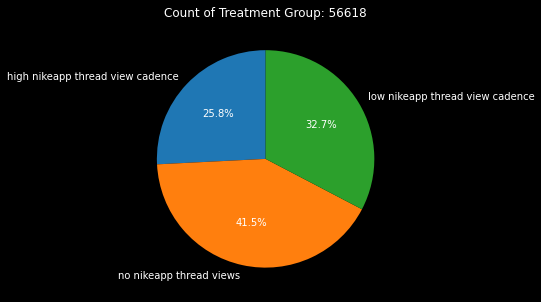

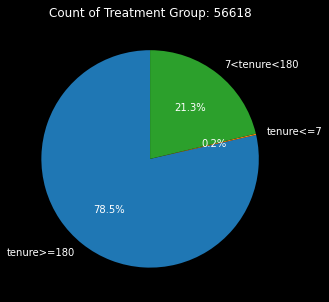

In [0]:
# get values from 'Sampling Matching' Databricks Widget
sampling_cols = sampling_val.split(',')
sampling_values = len(sampling_cols)
print(sampling_cols)


member=member.drop("sample_array")
member=member.drop("sampling")
member = member.select("*", f.array(sampling_cols).alias("sample_array"))

# create 'sampling' column by concatenating Sampling Matching values into single string
member = (member.select(concat_ws('_', "sample_array")
                                .alias("sampling"), "*")
                                .cache())




# create member_treatment and member_control based off the t_c_flag
member_treatment = member.filter("t_c_flag = 't'")
member_control = member.filter("t_c_flag = 'c'")


member_treatment_sampling_agg = (member_treatment.filter(~col('sampling').contains('unknown')).groupby('sampling', *[f.col('sample_array')[i].alias(f'sample{i}') for i in range(sampling_values)])
                .count()
                .withColumn("total", f.sum('count').over(Window.partitionBy()))\
                .withColumn("percent", f.col('count') / f.col('total'))
                .drop("total")
                .cache()
)           

member_treatment_sampling_agg_columns = member_treatment_sampling_agg.select(member_treatment.colRegex("`(sample)+?.+`")).columns

# used to display the member treatment group sampling percentages
for column in member_treatment_sampling_agg_columns:
  member_treatment_group_agg = (member_treatment_sampling_agg.groupBy(column)
                                                               .agg({"count":"sum", "percent":"sum"})
                                                               .withColumnRenamed("SUM(count)", "count")
                                                               .withColumnRenamed("SUM(percent)", "percent")
                                                               .filter(f.col(column).isNotNull()) 
                                                               .cache()
                                  )

  member_treatment_group_agg_df = member_treatment_group_agg.toPandas()
  sampling_column = member_treatment_group_agg_df[column]
  percent = member_treatment_group_agg_df['percent']

  fig = plt.figure(figsize=(5,5))
  fig.patch.set_facecolor('black')
  plt.rcParams['text.color'] = 'white'
  plt.pie(percent, labels=sampling_column, autopct='%1.1f%%', shadow=False, startangle=90, normalize=False)
  plt.title(f'Count of Treatment Group: {member_treatment.count()}')
  plt.show() 

##Synthetic Control Group Selection based on Selected Criteria

In [0]:

member_control_sampling_agg = (member_control.filter(~col('sampling').contains('unknown')).groupby('sampling', *[f.col('sample_array')[i].alias(f'sample{i}') for i in range(sampling_values)])
                                                .count()
                                                .withColumn("total", f.sum('count').over(Window.partitionBy()))\
                                                .withColumn("percent", f.col('count') / f.col('total'))
                                                .drop("total")
                                                .cache()
                                )           

member_control_pd=member_control.filter(~col('sampling').contains('unknown')).orderBy(rand()).limit(5000000).toPandas()
treatment_sampling = {row['sampling']: row['percent'] for row in member_treatment_sampling_agg.collect()}
control_sampling = {row['sampling']: row['percent'] for row in member_control_sampling_agg.collect()}


final_sampling={s:treatment_sampling[s]/control_sampling[s] for s in set(treatment_sampling.keys()).intersection(set(control_sampling.keys())) }
total = np.max(list(final_sampling.values()))
final_sampling = {k: v / total for k, v in final_sampling.items()}

for s in set(control_sampling.keys())-set(treatment_sampling.keys()):
  final_sampling[s]=0

member_control_sample = member_control_pd.groupby('sampling').apply(lambda x: x.sample(frac=final_sampling[x.name]))
del member_control_pd


member_control_sample['control_group_number'] = np.random.randint(1, num_control_groups+1, member_control_sample.shape[0])

# need to drop first_treatment_dt from control groups since it is treatment start date. to make the two groups more aligned we are updating it using a random first_treatment_dt from treatment group. This helps homohgenizing the two groups more for using days since treatment as the time-series index.
member_control_sample=member_control_sample.drop(columns=['sample_array','first_treatment_dt'])
member_treatment_first_treatment_dates = member_treatment.select("first_treatment_dt").rdd.flatMap(lambda x: x).collect()
member_control_sample['first_treatment_dt']=random.choices(member_treatment_first_treatment_dates,k=len(member_control_sample))

member_control_sample=spark.createDataFrame(member_control_sample)

member_control_sample=member_control_sample.orderBy(rand())
member_control_sample=member_control_sample.limit(1000000).cache()



## Member Engagement Time Series

In [0]:
member_eng_ts =  (clickstream_hit_eng
              .groupBy(f.col('upm_id'), f.col('hit_dt'))
              .agg(max(f.when(f.expr("nrc_app_use_count + ntc_app_use_count + nikeapp_app_use_count") > 0, 1).otherwise(0)).alias('ecosystem_app_use_flag'),
                   max(f.when(f.col("nrc_app_use_count") > 0, 1).otherwise(0)).alias('nrc_app_use_flag'),
                   max(f.when(f.col("ntc_app_use_count") > 0, 1).otherwise(0)).alias('ntc_app_use_flag'),
                   max(f.when(f.col("nikeapp_app_use_count") > 0, 1).otherwise(0)).alias('nikeapp_app_use_flag'),
                   max(f.when(f.col("nrc_run_start_count") > 0, 1).otherwise(0)).alias('nrc_run_start_flag'),
                   max(f.when(f.col("ntc_workout_start_count") > 0, 1).otherwise(0)).alias('ntc_workout_start_flag'),
                   max(f.when(f.col("nikeapp_add_to_cart_count") > 0, 1).otherwise(0)).alias('nikeapp_add_to_cart_flag'),
                   max(f.when(f.col("nikeapp_thread_cta_click_count") > 0, 1).otherwise(0)).alias('nikeapp_thread_cta_click_flag'),
                   max(f.when(f.col("email_link_click_count") > 0, 1).otherwise(0)).alias('email_link_click_flag'),
                   max(f.when(f.col("email_purchase_count") > 0, 1).otherwise(0)).alias('email_purchase_flag'),
                   max(f.when(f.expr("nikeapp_thread_view_count + nrc_thread_view_count + ntc_thread_view_count") > 0, 1).otherwise(0)).alias('ecosystem_thread_view_flag')
                  )
             )

# Joining with demand for calculating purchase KPIs

member_ts=member_eng_ts.join(member_digital_demand_ts, ["hit_dt", "upm_id"], "outer")

member_ts = member_ts.fillna(value=0)

In [0]:
# member_ts = (member_ts.withColumn('ecosystem_app_use_next_7d_flag',
#                                   f.when((f.sum(f.col('ecosystem_app_use_flag'))
#                                    .over(Window.partitionBy('upm_id').orderBy("hit_dt")
#                                    .rowsBetween(Window.currentRow + 1, 8)) > 0) & (f.col('ecosystem_app_use_flag')>0), 1)
#                                    .otherwise(0))
#             )

# member_ts = (member_ts.withColumn('ecosystem_thread_view_next_7d_flag',
#                                   f.when((f.sum(f.col('ecosystem_thread_view_flag'))
#                                    .over(Window.partitionBy('upm_id').orderBy("hit_dt")
#                                    .rowsBetween(Window.currentRow + 1, 8)) > 0) & (f.col('ecosystem_thread_view_flag')>0), 1)
#                                    .otherwise(0))
#             )

            
# member_ts = member_ts.fillna(value=0)


In [0]:
member_ts_treatment = member_ts.join(member_treatment, on="upm_id", how="inner")
member_ts_treatment = member_ts_treatment.withColumn("days_since_treatment", datediff(col("hit_dt"), col("first_treatment_dt"))).cache()

member_ts_control = member_ts.join(member_control_sample, on="upm_id", how="inner")
member_ts_control = member_ts_control.withColumn("days_since_treatment", datediff(col("hit_dt"), col("first_treatment_dt"))).cache()


## Create Target KPI Time-Series for Treatment and Control Groups from Member Time Series				

In [0]:
	target_kpi_treatment = (member_ts_treatment
                                .groupBy(f.col('days_since_treatment'))
                                .agg(
                                  countDistinct(f.when(f.col("nrc_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_nrc_app_opens'),
                                  countDistinct(f.when(f.col("ntc_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_ntc_app_opens'),
                                  countDistinct(f.when(f.col("nikeapp_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_app_opens'),
                                  countDistinct(f.when(f.col("ecosystem_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_ecosystemt_app_opens'),
                                  # countDistinct(f.when(f.col("ecosystem_app_use_next_7d_flag") > 0, col("upm_id"))).alias('unique_members_with_7d_returning_ecosystemt_app_opens'),
                                  countDistinct(f.when(f.col("ecosystem_thread_view_flag") > 0, col("upm_id"))).alias('unique_members_with_ecosystem_thread_views'),
                                  # countDistinct(f.when(f.col("ecosystem_thread_view_next_7d_flag") > 0,col("upm_id"))).alias('unique_members_with_7d_returning_ecosystem_thread_views'),                
                                  countDistinct(f.when(f.col("nrc_run_start_flag") > 0, col("upm_id"))).alias('unique_members_with_nrc_run_starts'),
                                  countDistinct(f.when(f.col("ntc_workout_start_flag") > 0, col("upm_id"))).alias('unique_members_with_ntc_workout_starts'),
                                  countDistinct(f.when(f.col("nikeapp_thread_cta_click_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_thread_cta_clicks'),
                                  countDistinct(f.when(f.col("email_link_click_flag") > 0, col("upm_id"))).alias('unique_members_with_email_link_clicks'),
                                  countDistinct(f.when(f.col("email_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_email_purchases'),
                                  countDistinct(f.when(f.col("nikeapp_add_to_cart_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_add_to_carts'),
                                  countDistinct(f.when(f.col("nddc_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_nddc_purchases'),
                                  countDistinct(f.when(f.col("selected_product_nddc_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_selected_product_group_nddc_purchases'),
                                  sum(f.col('nddc_purchase_amount')).alias('total_nddc_demand'),
                                  sum(f.col('selected_product_group_nddc_purchase_amount')).alias('selected_product_group_nddc_demand')
                                  
                                  )
                               )


In [0]:
target_kpi_control = (member_ts_control
                                .groupBy(f.col('days_since_treatment'), f.col('control_group_number'))
                                .agg(
                                  countDistinct(f.when(f.col("nrc_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_nrc_app_opens'),
                                  countDistinct(f.when(f.col("ntc_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_ntc_app_opens'),
                                  countDistinct(f.when(f.col("nikeapp_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_app_opens'),
                                  countDistinct(f.when(f.col("ecosystem_app_use_flag") > 0, col("upm_id"))).alias('unique_members_with_ecosystemt_app_opens'),
                                  # countDistinct(f.when(f.col("ecosystem_app_use_next_7d_flag") > 0, col("upm_id"))).alias('unique_members_with_7d_returning_ecosystemt_app_opens'),
                                  countDistinct(f.when(f.col("ecosystem_thread_view_flag") > 0, col("upm_id"))).alias('unique_members_with_ecosystem_thread_views'),
                                  # countDistinct(f.when(f.col("ecosystem_thread_view_next_7d_flag") > 0,col("upm_id"))).alias('unique_members_with_7d_returning_ecosystem_thread_views'),                
                                  countDistinct(f.when(f.col("nrc_run_start_flag") > 0, col("upm_id"))).alias('unique_members_with_nrc_run_starts'),
                                  countDistinct(f.when(f.col("ntc_workout_start_flag") > 0, col("upm_id"))).alias('unique_members_with_ntc_workout_starts'),
                                  countDistinct(f.when(f.col("nikeapp_thread_cta_click_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_thread_cta_clicks'),
                                  countDistinct(f.when(f.col("email_link_click_flag") > 0, col("upm_id"))).alias('unique_members_with_email_link_clicks'),
                                  countDistinct(f.when(f.col("email_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_email_purchases'),
                                  countDistinct(f.when(f.col("nikeapp_add_to_cart_flag") > 0, col("upm_id"))).alias('unique_members_with_nikeapp_add_to_carts'),
                                  countDistinct(f.when(f.col("nddc_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_digital_purchases'),
                                  countDistinct(f.when(f.col("selected_product_nddc_purchase_flag") > 0, col("upm_id"))).alias('unique_members_with_selected_product_group_nddc_purchases'),
                                  sum(f.col('nddc_purchase_amount')).alias('total_nddc_demand'),
                                  sum(f.col('selected_product_group_nddc_purchase_amount')).alias('selected_product_group_nddc_demand')
                                  )
                               )

## Target KPI Table read/Write

In [0]:
# used for target_kpi_treatment and  target_kpi_control S3 paths
sampling_path = sampling_val.replace(",", "-")
sampling_path = sampling_path.replace("_", "-")

try:
  target_kpi_treatment = spark.read.parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_treatment/{project_val}-{sampling_path}')
  
  print("Table already exists, reading the treatment target KPI table from saved path")
except:
  (target_kpi_treatment
   .write
   .mode('overwrite')
   .parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_treatment/{project_val}-{sampling_path}')
  )
  
  target_kpi_treatment = spark.read.parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_treatment/{project_val}-{sampling_path}')
  
  print("New treatment target KPI table saved to S3")

Table already exists, reading the treatment target KPI table from saved path

In [0]:
try:
  target_kpi_control = spark.read.parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_control/{project_val}-{sampling_path}')
  
  print("Table already exists, reading the control target KPI table from saved path")
except:
  (target_kpi_control
   .write
   .mode('overwrite')
   .parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_control/{project_val}-{sampling_path}')
   )
  
  target_kpi_control = spark.read.parquet(f's3://digital-pschemas-persistent-secure-east/gck/dhelf/cpa/causal_impact/target_kpi_control/{project_val}-{sampling_path}')
  print("New control target KPI table saved to S3")


Table already exists, reading the control target KPI table from saved path

## Run Causal Impact Analysis for Selected Target KPI

In [0]:
# Final pandas dataframe after filtering for one target KPI granularity
final = target_kpi_treatment.toPandas()[['days_since_treatment', target_kpi_val]]
final.set_index('days_since_treatment', inplace=True)
final = final.merge(target_kpi_control.toPandas().pivot(index='days_since_treatment',columns='control_group_number',values=target_kpi_val),left_index=True, right_index=True)

final= final.sort_index(ascending=True)
final = final.rename(columns={target_kpi_val: 'treatment_group'})

#final.columns = ['treatment_group']+['synthetic_control_group_'+str(i+1) for i in range(num_control_groups+1)]
final.columns = ['treatment_group']+['synthetic_control_group_'+str(i+1) for i in range(num_control_groups)]

final = final.fillna(0.0)

print("Current Target KPI to be used for Causal Impact Analysis: {0}".format(target_kpi_val))

Current Target KPI to be used for Causal Impact Analysis: unique_members_with_selected_product_group_nddc_purchases

The causality analysis has two assumptions:
* Assumption 1: There are one or more control time series that are highly correlated with the response variable, but not impacted by the treatment. Violation of this assumption can result in wrong conclusions about the existence, the direction, or the magnitude of the treatment effect.
* Assumption 2: The correlation between the control and the response time series is the same for pre and post treatment.

The synthetic time series data we created satisfy the two assumptions.

The python `CausalImpact` package has a function called `CausalImpact` that implements a Bayesian Structural Time Series Model (BSTS) on the backend. It has three required inputs:
* `data` takes the python dataframe name.
* `pre_period` takes the starting and the ending index values for the pre-treatment period.
* `post_period` takes the starting and the ending index values for the post-treatment period.

After saving the output object in a variable called `impact`, we can run `impact.plot()` to visualize the results.

Out[60]:

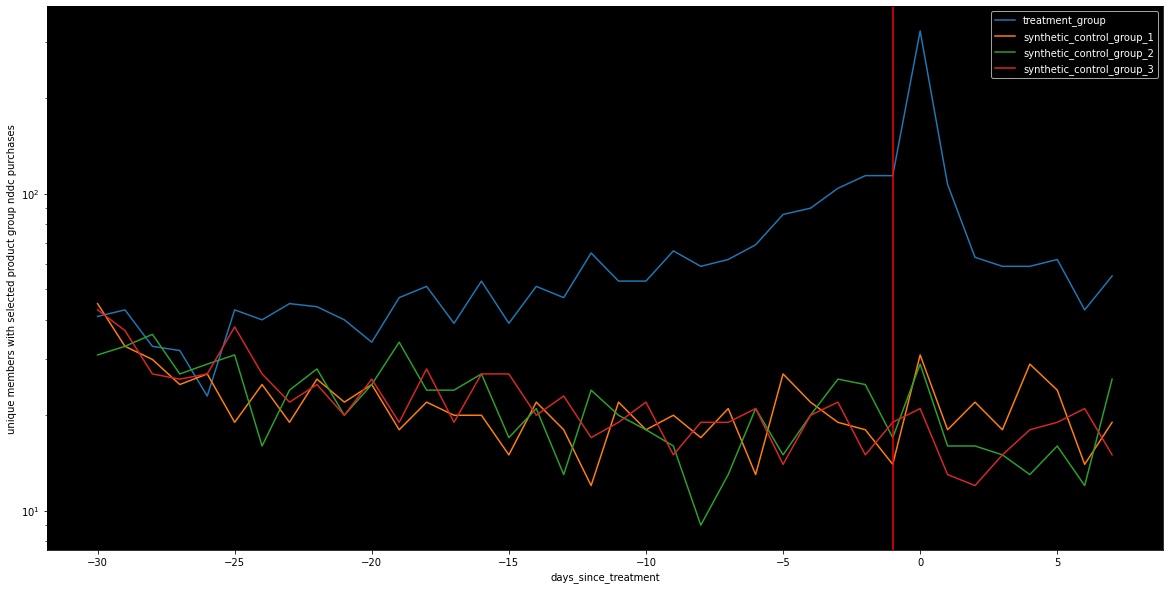

<matplotlib.lines.Line2D at 0x7f26c80bc880>

In [0]:
fig = final.loc[-1*pre_period_val:post_period_val].plot(figsize=(20,10), title='', ylabel = target_kpi_val.replace("_", " "), logy=True);
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
plt.legend(facecolor="black")
plt.axvline(x=-1, color='red')

In [0]:
pre_period = [-1*pre_period_val, -1]
post_period = [0, post_period_val]

ci = CausalImpact(final, pre_period, post_period)

/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
 warnings.warn('An unsupported index was provided and will be'
/databricks/python/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
 warnings.warn('No supported index is available.'

## Interpreting Causal Impact Analysis
Was the Content Effective for the Selected Target KPI?

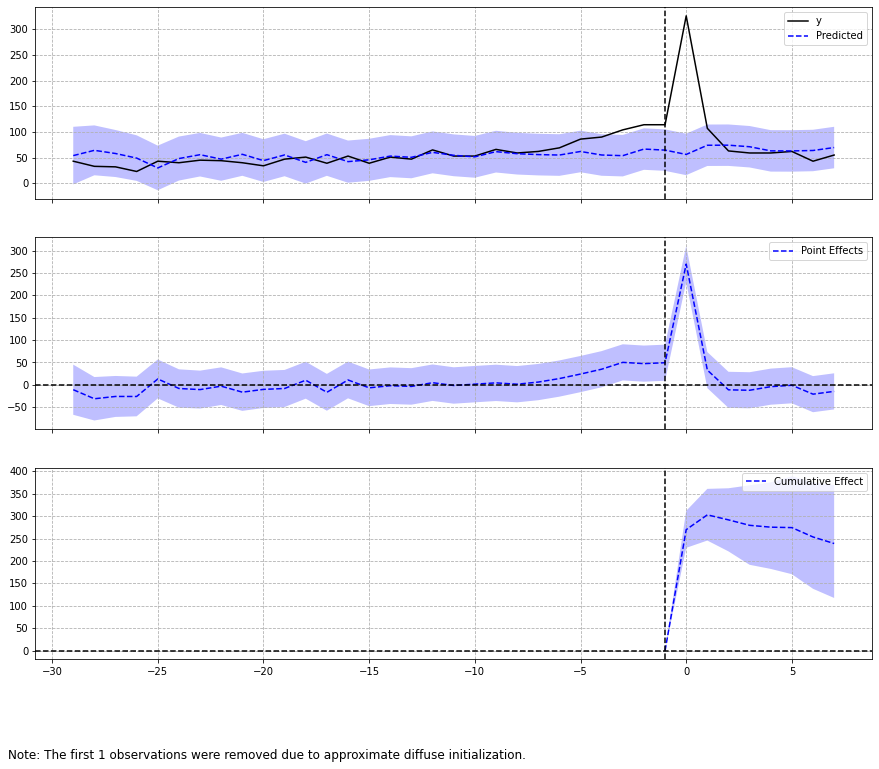

In [0]:
plt.rcParams['text.color'] = 'black'

figsize = (20, 6)

ci.plot()

The **average** column, shows average daily data for the post-treatment window. The **cumulative** column deals with the cumulative effect after the treatment which shows the overall impact of the treatment over the post-treatment window.

The **Actual** row shows the actual observations. The **prediction** row shows the model results without treatment (the counterfactual).

The **absolute effect** row shows the estimated impact using the difference between the actuals and preditions. **(Absolute effect = Actual - Prediction)**

The **relative effect** row shows the estimated impact using the ratio of difference between the actuals and preditions and the preditions. **(Relative effect = (Actual - Prediction)/Prediction)**

The **95%CI** shows the results for a 95% confidence interval.

The **posterior tail-area probability p** is a statistical measure of how certain we are that seeing the effect didn't happen by chance. For a full explanation, see [here](https://stats.stackexchange.com/questions/263763/what-does-posterior-tail-area-probability-mean-in-causal-impact), but the lower this number is, the better.

If the p-value is under .05, results are considered statistically significant and if it's below .005 they are considered highly statistically significa

In [0]:
print(ci.summary())

Posterior Inference {Causal Impact}
 Average Cumulative
Actual 96.75 774.0
Prediction (s.d.) 66.89 (8.01) 535.12 (64.12)
95% CI [50.64, 82.06] [405.11, 656.46]

Absolute effect (s.d.) 29.86 (8.01) 238.88 (64.12)
95% CI [14.69, 46.11] [117.54, 368.89]

Relative effect (s.d.) 44.64% (11.98%) 44.64% (11.98%)
95% CI [21.97%, 68.94%] [21.97%, 68.94%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))

In [0]:
# Causal impact report
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 96.75. By contrast, in the absence of an
intervention, we would have expected an average response of 66.89.
The 95% interval of this counterfactual prediction is [50.64, 82.06].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 29.86 with a 95% interval of
[14.69, 46.11]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 774.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 535.12. The 95% interval of this prediction is [405.11, 656.46].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed an increase of +44.64%. The 95%
interval of this percentage is [21.97%, 68.94%].


This means that the positive effect observed during the intervention
period is statistically significant and unlikely to be due to random
fluctuations. It should be noted, however, that the question of whether
this increase also bears substantive significance can only be answered
by comparing the absolute effect (29.86) to the original goal
of the underlying intervention.


The probability of obtaining this effect by chance is very small
(Bayesian one-sided tail-area probability p = 0.0).
This means the causal effect can be considered statistically
significant.

In [0]:
#ci.alpha
#ci.n_sims
#ci.model_args
#ci.lower_upper_percentile
#ci.post_normed_data
#ci.pre_normed_data
#ci.summary_data.loc['predicted]['cumulative']
#ci.inferences

causal_impact_df = ci.inferences
rslt_df = causal_impact_df[causal_impact_df.index > -1][['post_cum_y', 'preds', 'point_effects',
       'point_effects_lower', 'point_effects_upper', 'post_cum_effects',
       'post_cum_effects_lower', 'post_cum_effects_upper']]
rslt_df.columns=['actuals', 'counterfactual predictions', 'point_effects','point_effects_lower_ci', 'point_effects_upper_ci', 'cumalative_effects','cumalative_effects_lower_ci', 'cumalative_effects_upper_ci']

rslt_df.head(30)

Out[65]:

,actuals,counterfactual predictions,point_effects,point_effects_lower_ci,point_effects_upper_ci,cumalative_effects,cumalative_effects_lower_ci,cumalative_effects_upper_ci
days_since_treatment,,,,,,,,
0,326.0,56.161176,269.838824,229.492381,310.185267,269.838824,229.217961,311.714687
1,433.0,74.051989,32.948011,-7.402161,73.298183,302.786835,245.511734,360.711480
2,496.0,74.179602,-11.179602,-51.533503,29.174298,291.607232,221.364538,362.041900
3,555.0,71.160804,-12.160804,-52.518432,28.196824,279.446428,191.465984,368.627214
4,614.0,63.103619,-4.103619,-44.464975,36.257736,275.342809,182.300119,375.041104
5,676.0,62.990195,-0.990195,-41.355278,39.374888,274.352614,170.528191,388.693988
6,719.0,63.860064,-20.860064,-61.228874,19.508746,253.492551,138.003688,375.231162
7,774.0,69.611210,-14.611210,-54.983746,25.761327,238.881341,117.542640,368.885793


In [0]:
#ax = ci.inferences.post_cum_effects.plot(figsize=(15,6))
#ci.inferences.post_cum_effects_upper.plot(ax=ax, style='r--')
#ci.inferences.post_cum_effects_lower.plot(ax=ax, style='r--')

In [0]:
now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 21:19:36

In [0]:
## show actual dates for any splike


# display(member_ts_treatment.where((f.col('days_since_treatment')==0)&(f.col('digital_purchase_flag')==1)).groupBy('first_treatment_dt').count().orderBy('count'))